<a href="https://colab.research.google.com/github/sreejakatta14/machine_learning/blob/main/ml3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIMPLE LINEAR REGRESSION USING TABULAR METHOD**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def estimate_coef(x,y):
  n=np.size(x)
  m_x=np.mean(x)
  m_y=np.mean(y)
  SS_xy=np.sum(y*x)-n*m_y*m_x
  SS_xx=np.sum(x*x)-n*m_x*m_x
  b_1=SS_xy/SS_xx
  b_0=m_y-b_1*m_x
  return(b_0,b_1)

In [ ]:
def plot_regression_line(x,y,b):
  plt.scatter(x,y,color="m",marker="o",s=30)
  y_pred=b[0]+b[1]*x
  plt.plot(x,y_pred,color="g")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

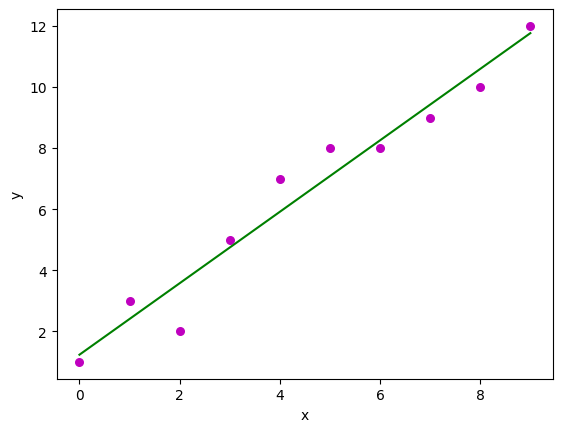

Estimated coefficients:
b_0 = 1.2363636363636363 
b_1 = 1.1696969696969697


In [ ]:
x=np.array([0,1,2,3,4,5,6,7,8,9])
y=np.array([1,3,2,5,7,8,8,9,10,12])
b=estimate_coef(x,y)
plot_regression_line(x,y,b)
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(*b))

**MULTIPLE LINEAR REGRESSION USING TABULAR METHOD**

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [ ]:
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2,:2]])
y = raw_df.values[1::2,2]

In [ ]:
X_train, X_test, \
  y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Coefficients: ', reg.coef_)
print('Variance score: {}.'.format(reg.score(X_test,y_test)))

Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.720905667266174.


In [ ]:
plt.style.use('fivethirtyeight')

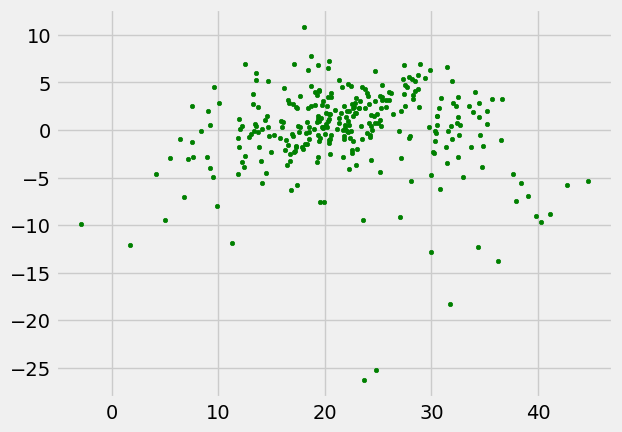

In [ ]:
plt.scatter(reg.predict(X_train), reg.predict(X_train)-y_train, color="green", s=10, label='Train data')

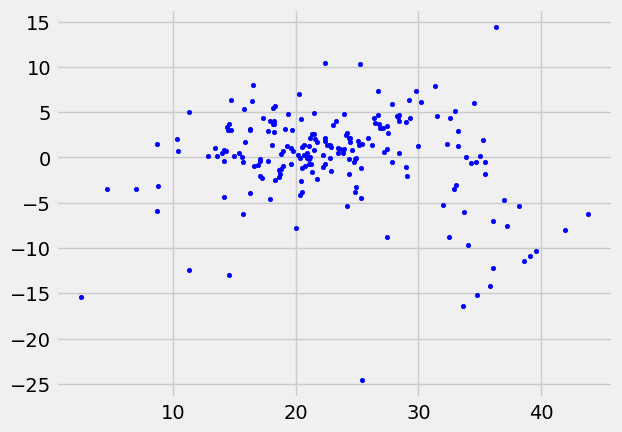

In [ ]:
plt.scatter(reg.predict(X_test), reg.predict(X_test)-y_test, color="blue", s=10, label='Test data')

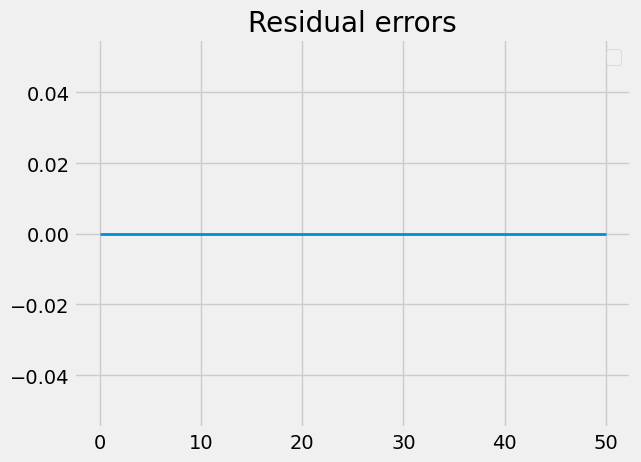

In [ ]:
plt.hlines(y=0,xmin=0,xmax=50,linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.show()

**LINEAR REGRESSION**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [ ]:
# Get dataset
df_sal = pd.read_csv('sample_data/salary_data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<ipython-input-37-2d754b325291>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


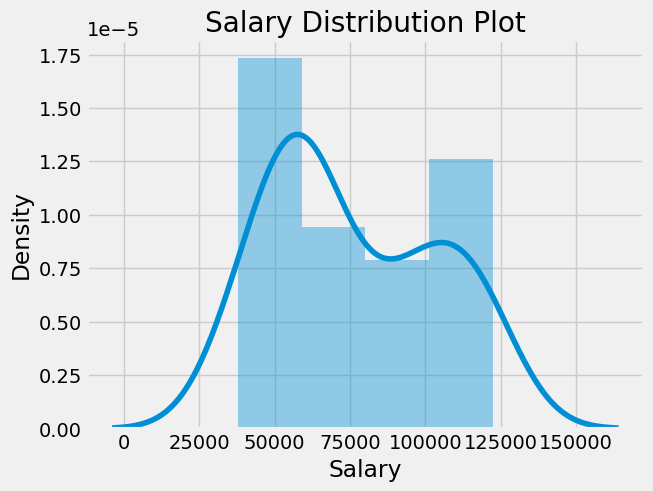

In [ ]:

# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

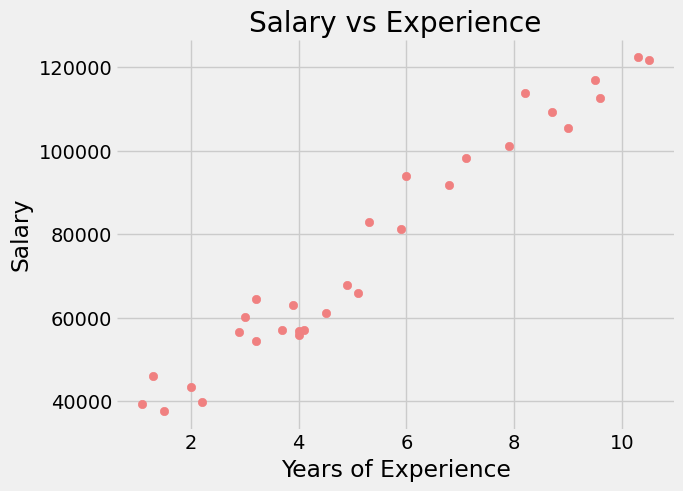

In [ ]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [ ]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

In [ ]:

# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:

# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

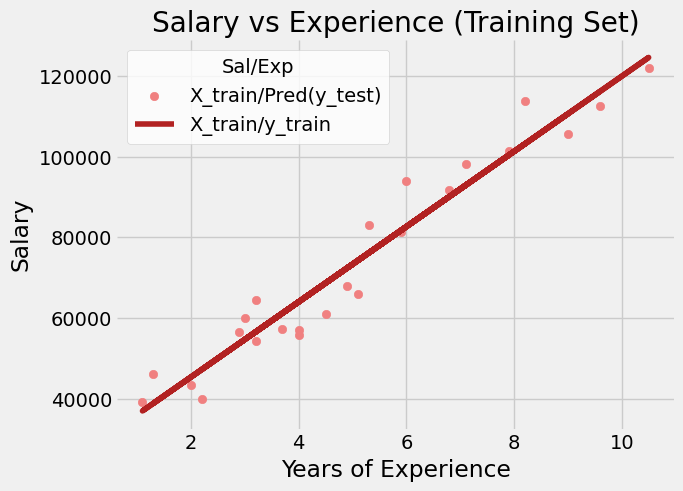

In [ ]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

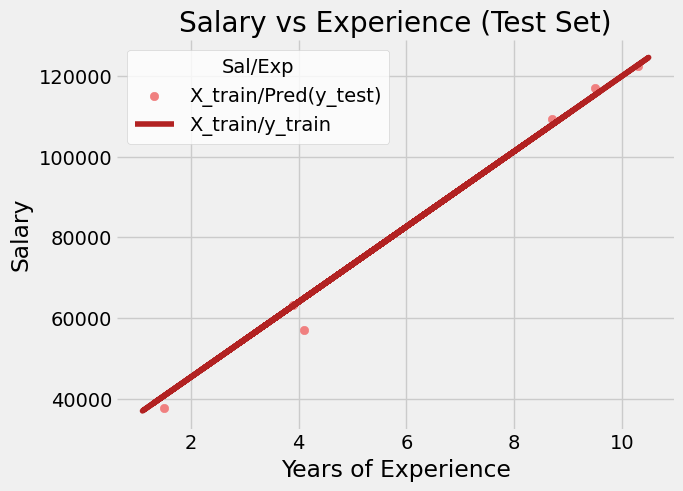

In [ ]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9312.57512673]]
Intercept: [26780.09915063]


**MULTIPLE LINEAR REGRESSION**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
# Get dataset
df_start = pd.read_csv('sample_data/50_Startups.csv')
df_start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:

# Describe data
df_start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<ipython-input-50-09ff1edfb7fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_start['Profit'])


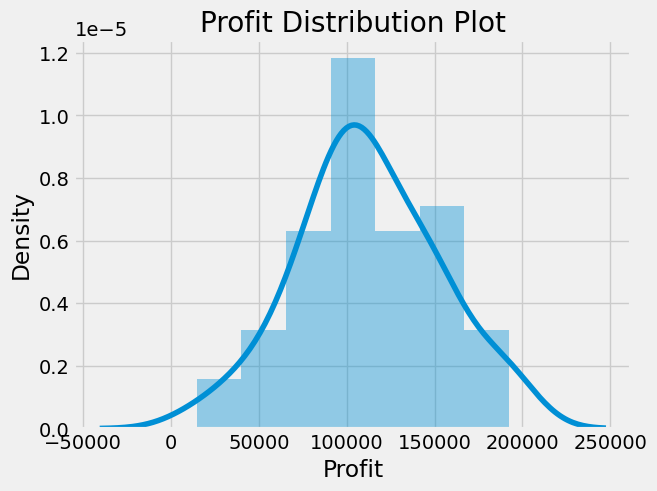

In [ ]:

# Data distribution
plt.title('Profit Distribution Plot')
sns.distplot(df_start['Profit'])
plt.show()

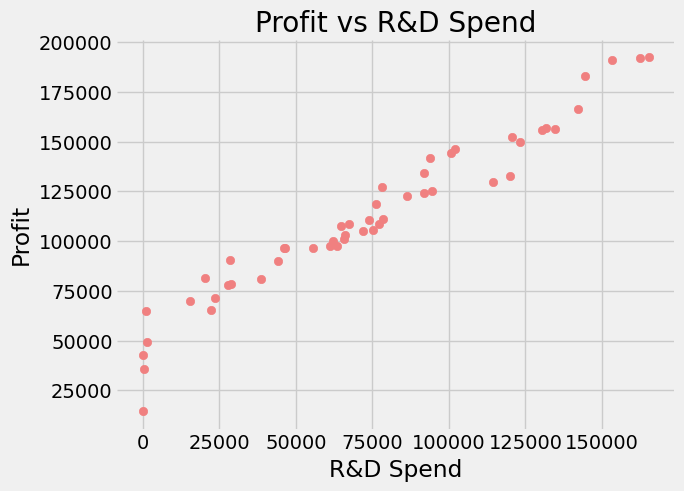

In [ ]:

# Relationship between Profit and R&D Spend
plt.scatter(df_start['R&D Spend'], df_start['Profit'], color = 'lightcoral')
plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.box(False)
plt.show()

In [ ]:

# Split dataset in dependent/independent variables
X = df_start.iloc[:, :-1].values
y = df_start.iloc[:, -1].values

In [ ]:
# One-hot encoding of categorical data
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:


# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:

# Train multiple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Predict result
y_pred = regressor.predict(X_test)

In [ ]:

# Compare predicted result with actual value
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
result

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])